# Reducing Traffic Mortality

## Import Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [49]:
accidents_df = pd.read_csv('./datasets/road-accidents.csv', header=9, delimiter='|')
accidents_df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [50]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [51]:
rows, columns = accidents_df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 51
Number of columns: 5


**Inference:**

There are 51 rows and 5 column in the dataset. No nulls values present in the dataset.

## Create a textual and a graphical summary of the data

In [52]:
accidents_df.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


<Figure size 1080x576 with 0 Axes>

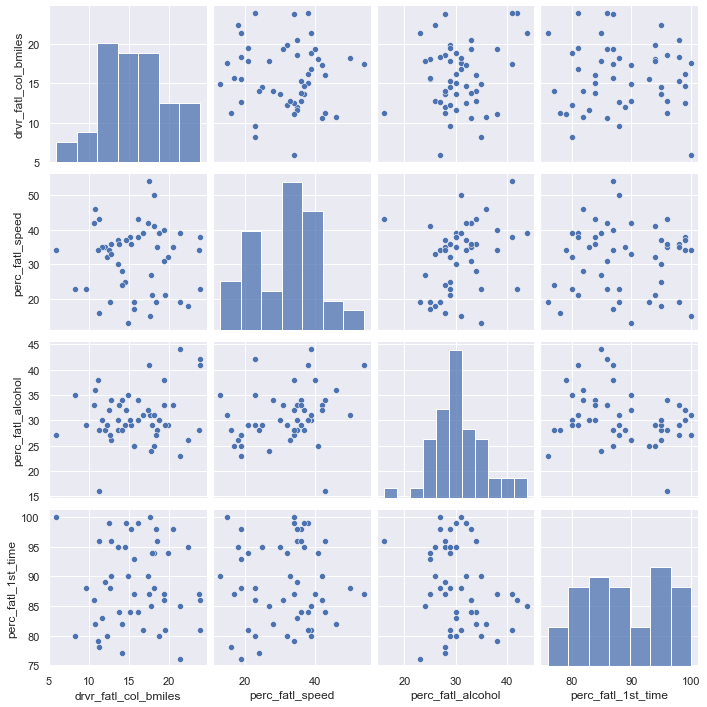

In [53]:
plt.figure(figsize=(15, 8))
sns.pairplot(accidents_df)

**Inference:**

All the features in the dataset are compared with one another. We can here observe that none of the feature is correlated with any other feature. Data points are either scattered across the plot or they are going in inverse direction because of weak correlation.


## Quantify the association of features and accidents

<b>Correlation Matrix</b>

In [54]:
matrix = accidents_df.corr()
matrix

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


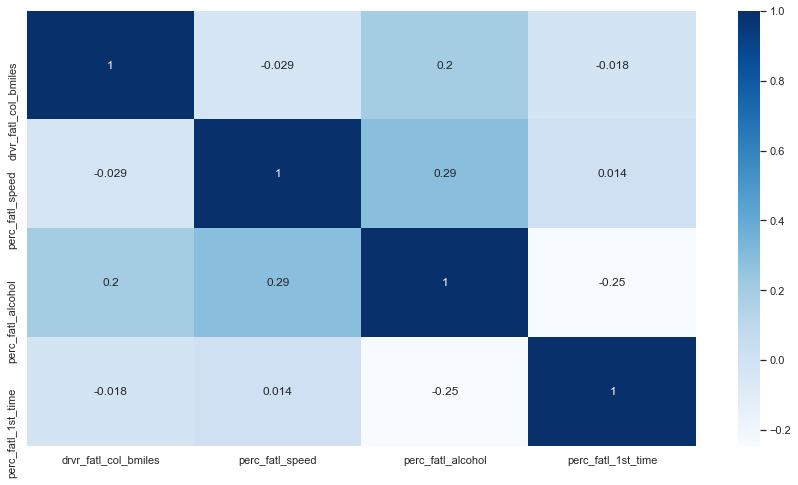

In [55]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.show()

**Inference**

- There is no positive correlation between any of the features.
- The correlation between **drvr_fatl_col_bmiles** and **perc_fatl_1st_time** is -0.018, which indicates that they’re weakly negatively correlated. 
- The correlation between **perc_fatl_speed** and **perc_fatl_1st_time** is 0.014, which indicates that they’re basically not correlated. There is very little association between the 2 features.
- Correlation coefficients along the diagonal of the table are all equal to 1 because each variable is perfectly correlated with itself.


## Fit a multivariate linear regression

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
linear_regression = LinearRegression()

<b>Divide into dependent & independent features<b>

In [58]:
accidents_df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [59]:
X = accidents_df.iloc[:, 2:5]
y = accidents_df['drvr_fatl_col_bmiles']

In [60]:
X.head()

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,39,30,80
1,41,25,94
2,35,28,96
3,18,26,95
4,35,28,89


In [61]:
y.head()

0    18.8
1    18.1
2    18.6
3    22.4
4    12.0
Name: drvr_fatl_col_bmiles, dtype: float64

<b>Split data to training and test set<b>

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
X_train.head()

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
41,31,33,86
27,13,35,90
35,28,34,82
34,23,42,86
7,38,30,99


In [65]:
y_test.head()

29    11.6
11    17.5
10    15.6
22    14.1
2     18.6
Name: drvr_fatl_col_bmiles, dtype: float64

<b>Fit the training set to LinearRegression model<b>

In [66]:
linear_reg = linear_regression.fit(X_train, y_train)
linear_reg

LinearRegression()

<b>Prediction<b>

In [67]:
prediction=linear_reg.predict(X_test)
prediction

array([15.73925232, 16.12193976, 15.80236078, 16.05287496, 15.40292435,
       15.75123639, 15.86813342, 15.78319857, 17.16238394, 15.45941962,
       15.6905138 ])

<b>Compare predicted results with real result<b>

In [68]:
from sklearn.metrics import r2_score

In [69]:
score = r2_score(y_test, prediction)

In [70]:
score

0.11654346208632727

**Inference**

Output is 0.116 which is far away from the value 1. It is nearer to zero. It means model built using LinearRegression is not good.

## Perform PCA on standardized data

<b>Split into training and test set<b>

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<b>Standardize our feature set first<b>

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scalar=StandardScaler()

In [75]:
scaled_features = scalar.fit_transform(X)

In [76]:
scaled_features

array([[ 0.76264511, -0.1350496 , -1.26611685],
       [ 0.97232113, -1.1189824 ,  0.76536053],
       [ 0.34329308, -0.52862272,  1.05557158],
       [-1.43895304, -0.92219584,  0.91046605],
       [ 0.34329308, -0.52862272,  0.03983289],
       [ 0.5529691 , -0.52862272,  0.91046605],
       [ 1.49651116,  1.04566976, -0.9759058 ],
       [ 0.6578071 , -0.1350496 ,  1.49088816],
       [ 0.23845508, -0.72540928,  1.63599369],
       [-1.12443902, -0.33183616,  0.76536053],
       [-1.33411503, -1.1189824 ,  0.620255  ],
       [ 2.33521522,  2.02960256, -0.25037816],
       [ 0.44813109, -0.33183616,  1.34578263],
       [ 0.44813109,  0.65209664,  1.05557158],
       [-0.70508699, -0.33183616,  0.91046605],
       [-1.54379105, -1.1189824 , -0.25037816],
       [-0.49541097, -1.31576896, -0.54058922],
       [-1.33411503, -1.51255552, -1.84653896],
       [ 0.34329308,  0.45531008,  1.34578263],
       [ 0.6578071 , -0.1350496 , -0.68569475],
       [ 0.23845508,  0.25852352,  1.490

<b>Applying PCA<b>

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA()
pca

PCA()

In [79]:
pca.fit(scaled_features)

PCA()

<b>Plot the proportion of variance explained on the y-axis of the bar plot<b>

The cumulative variance of the first two principal components is 0.7947


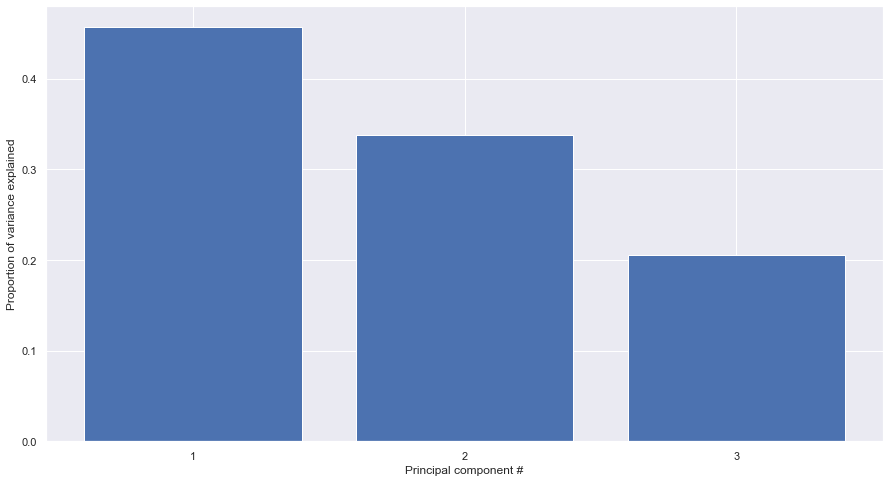

In [80]:
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])
two_first_comp_var_exp = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

## Visualize the first two principal components

<b>Transform the scaled features using two principal components<b>

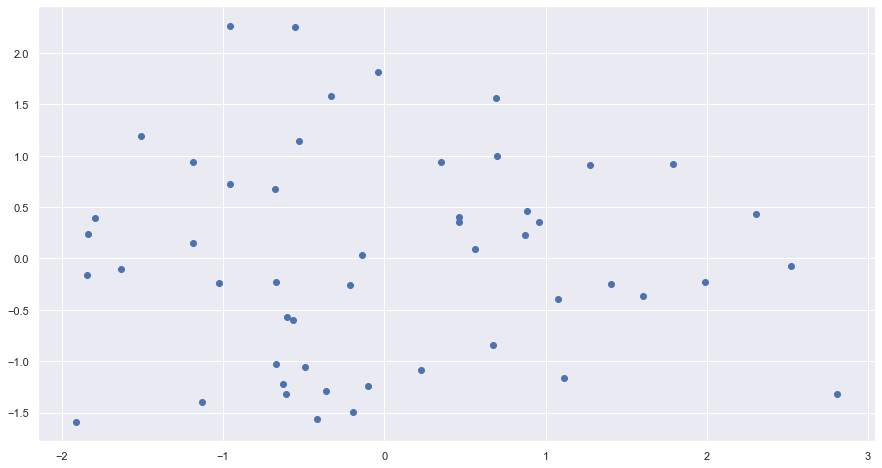

In [81]:
pca = PCA(n_components=2)
p_comps = pca.fit_transform(scaled_features)
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]
plt.scatter(p_comp1,p_comp2)

## Find clusters of similar states in the data

c:\Users\Home\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


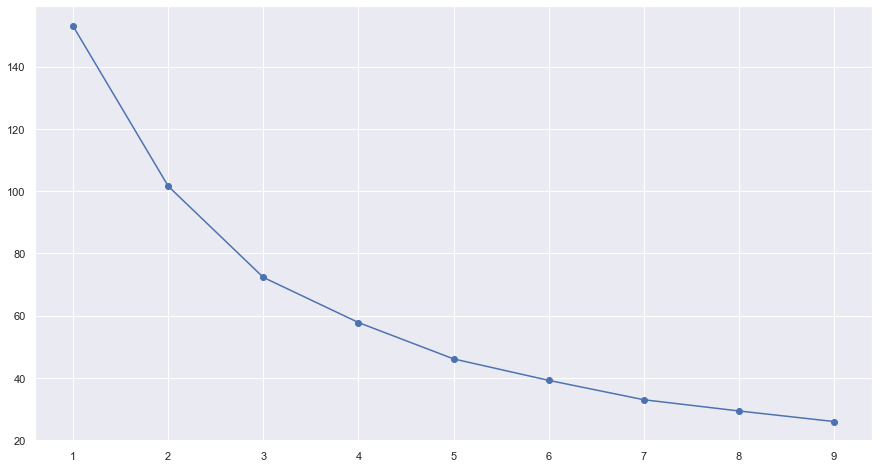

In [83]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=8)
    km.fit_transform(scaled_features)
    inertias.append(km.inertia_)
    
plt.plot(list(ks), inertias, marker='o')

## KMeans to visualize clusters in the PCA scatter plot

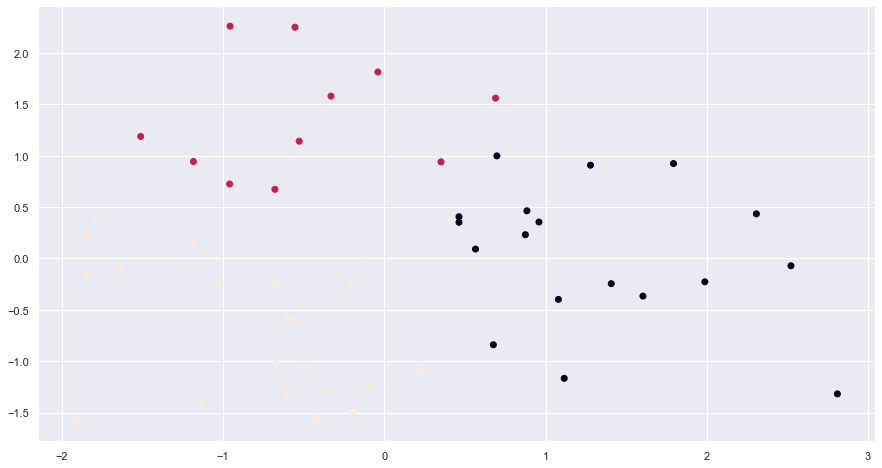

In [84]:
km = KMeans(n_clusters=3, random_state=8)
km.fit(scaled_features)
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_)

## Visualize the feature differences between the clusters

In [89]:
accidents_df['cluster'] =km.labels_
melt_car = pd.melt(accidents_df ,id_vars='cluster' ,var_name='measurement', value_name='percent',value_vars=['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time'] )
melt_car.head(5)

,cluster,measurement,percent
0,0,perc_fatl_speed,39
1,2,perc_fatl_speed,41
2,2,perc_fatl_speed,35
3,2,perc_fatl_speed,18
4,2,perc_fatl_speed,35


c:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='percent', ylabel='measurement'>

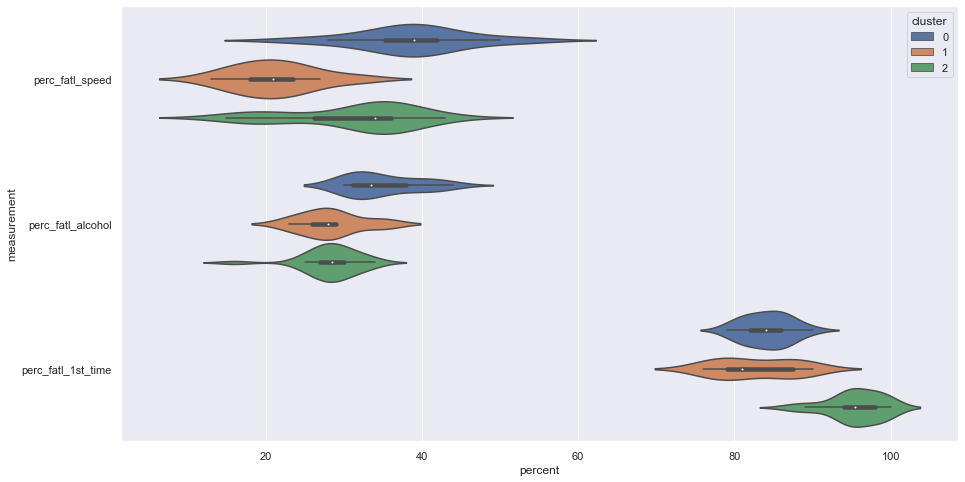

In [92]:
sns.violinplot(melt_car['percent'], melt_car['measurement'], hue=melt_car['cluster'])

## Compute the number of accidents within each cluster

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time    cluster  million_miles_annually  \
count            51.00000  51.000000               51.000000   
mean             88.72549   1.078431            57851.019608   
std               6.96011   0.890913            59898.414088   
min              76.00000   0.000000             3568.000000   
25%              83.50000   0.000000            17450.000000   
50%         

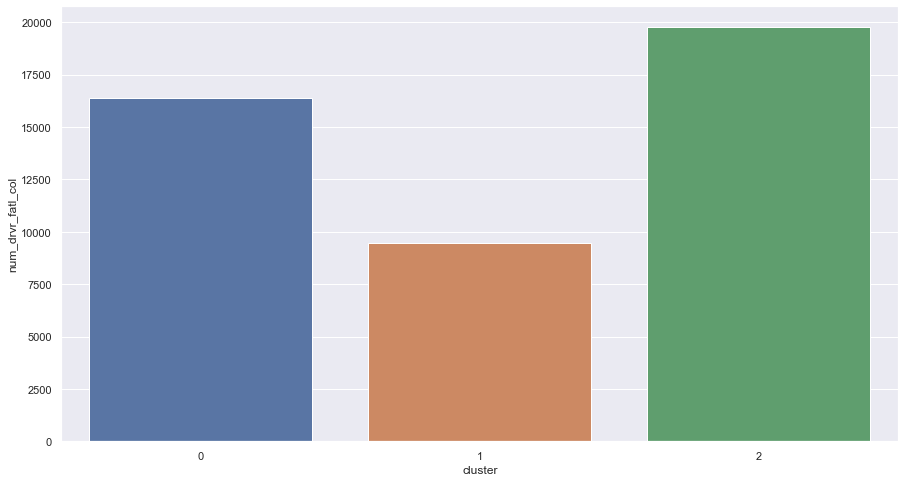

In [93]:
miles_driven = pd.read_csv('./datasets/miles-driven.csv', sep='|')
car_acc_miles = pd.merge(accidents_df, miles_driven, on='state')
car_acc_miles['num_drvr_fatl_col']=(car_acc_miles['drvr_fatl_col_bmiles']/1000)*car_acc_miles['million_miles_annually']
sns.barplot(x=car_acc_miles['cluster'], y=car_acc_miles['num_drvr_fatl_col'], data=car_acc_miles, estimator=sum, ci=None)
print(car_acc_miles.describe())
count_mean_sum = car_acc_miles.groupby('cluster').num_drvr_fatl_col.agg(['count','mean','sum'])
print(count_mean_sum)

## Make a decision when there is no clear right choice

**Inference:**

- cluster 1 has less number of traffic accidents than cluster 0 and cluster 2.
- cluster 2 has more number of traffic accidents than cluster 0 and cluster 1.